In [3]:
#  Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
# Load the data
df = pd.read_csv('D:/myproject/predicting fraudulent transactions/Fraud.csv')

In [5]:
# Explore the data
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04

In [6]:
# Data Cleaning
print(df.isnull().sum())  


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


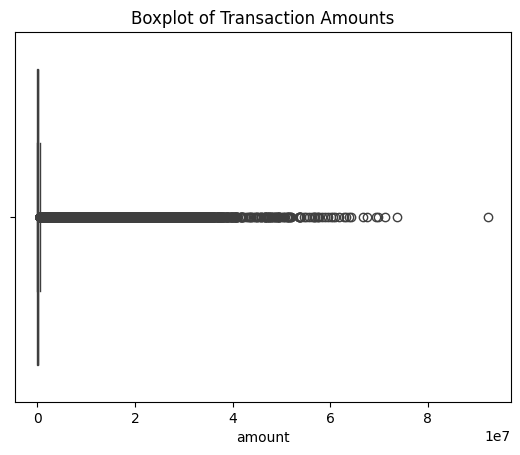

In [7]:
# Handle Outliers
sns.boxplot(x=df['amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

amount_threshold = df['amount'].quantile(0.99)
df = df[df['amount'] <= amount_threshold]


In [8]:
#  One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['type'], drop_first=True)


In [9]:
#  Feature and target variable selection
X = df.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
y = df['isFraud']


In [10]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#  Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
#  Model Training with RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

In [11]:
#  Predictions
y_pred = model.predict(X_test)


In [12]:
#  Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1258464      28]
 [    368     939]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1258492
           1       0.97      0.72      0.83      1307

    accuracy                           1.00   1259799
   macro avg       0.99      0.86      0.91   1259799
weighted avg       1.00      1.00      1.00   1259799



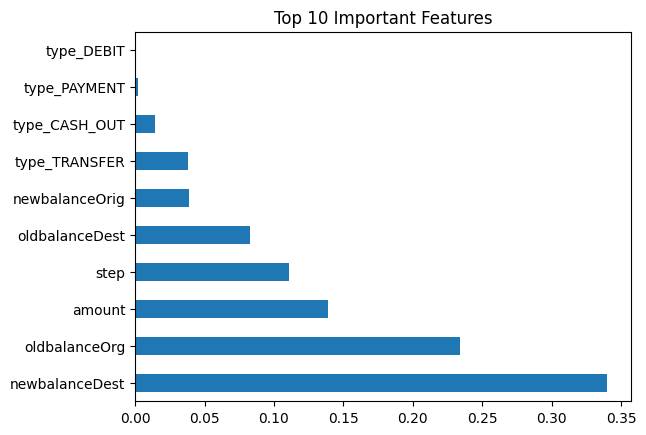

In [13]:
#  Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


In [14]:
#  Save the model for future use
import joblib
joblib.dump(model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']